# Zomato Restaurant Clustering Project

## Problem Statement
The goal of this project is to analyze Zomato restaurant data and group similar restaurants using clustering techniques. This helps in understanding restaurant segments based on cost, rating, and cuisine.




🔗 **GitHub Repository:**  
https://github.com/prajwall20/Zomoto-Restuarant-Clustering-Project


## Dataset Structure

The dataset contains multiple columns including restaurant attributes such as cuisine, cost, and rating. Some columns contain missing values, and both numerical and categorical features are present.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


In [3]:
restaurants = pd.read_csv("../data/Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("../data/Zomato Restaurant reviews.csv")


In [4]:
restaurants.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
restaurants.shape


(105, 6)

In [6]:
restaurants.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


### Missing Values Analysis

The `Collections` column contains missing values, while most other columns are complete.  
These missing values will be handled during the data cleaning stage.


In [7]:
restaurants.isnull().sum()


Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

### Cost Column Cleaning

The `Cost` column was originally stored as text.  
Non-numeric characters were removed and the column was converted to numeric format to make it suitable for analysis and clustering.


In [8]:
# Remove commas and non-numeric characters from Cost
restaurants['Cost'] = (
    restaurants['Cost']
    .str.replace(',', '', regex=True)
    .str.extract('(\d+)')[0]
)

# Convert Cost to numeric
restaurants['Cost'] = pd.to_numeric(restaurants['Cost'], errors='coerce')


In [9]:
restaurants['Cost'].dtype


dtype('int64')

### Missing Value Treatment

The `Collections` column was removed due to a high number of missing values.  
Missing values in the `Timings` column were filled with a placeholder value to maintain data consistency.


In [10]:
# Drop Collections column due to many missing values
restaurants = restaurants.drop(columns=['Collections'])

# Fill missing Timings
restaurants['Timings'] = restaurants['Timings'].fillna('Not Available')


In [11]:
restaurants.isnull().sum()


Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

## Exploratory Data Analysis – Visualizations

This section explores the dataset visually to understand the distribution and patterns of restaurant cost, cuisines, and basic textual attributes. These insights help identify trends and prepare the data for clustering.


### Plot 1: Distribution of Restaurant Cost

This plot shows how restaurant costs are distributed. It helps identify whether most restaurants are low-cost, mid-range, or expensive.


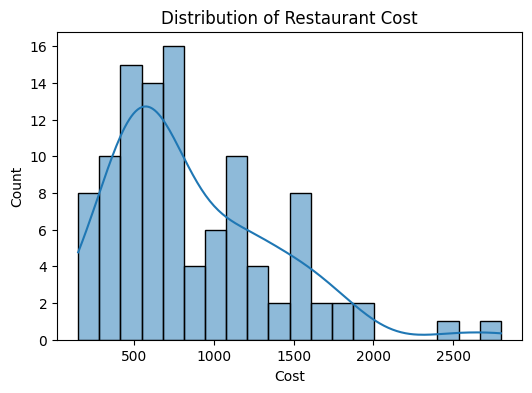

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(restaurants['Cost'], bins=20, kde=True)
plt.title("Distribution of Restaurant Cost")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()


### Plot 2: Boxplot of Restaurant Cost

This boxplot highlights outliers and the overall spread of restaurant costs.


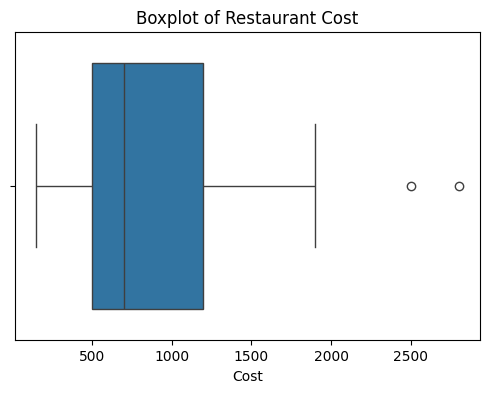

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=restaurants['Cost'])
plt.title("Boxplot of Restaurant Cost")
plt.show()


### Plot 3: Top 10 Most Common Cuisines

This plot shows the most frequently occurring cuisines in the dataset.


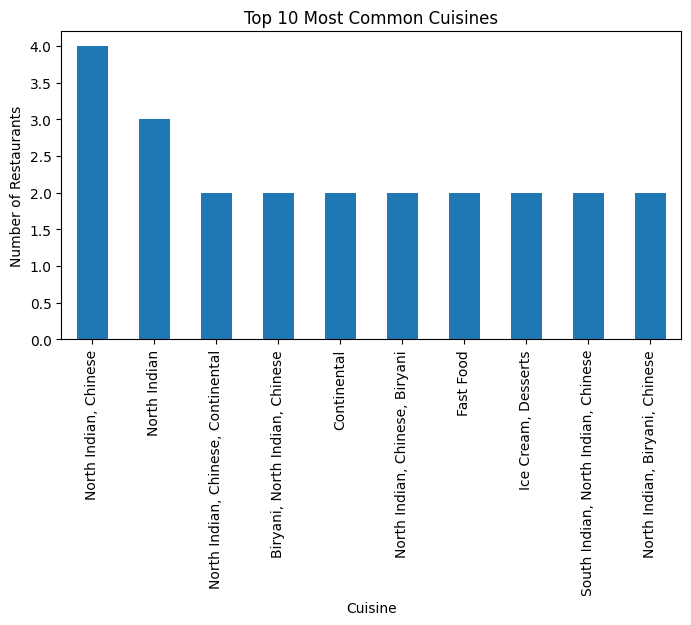

In [14]:
restaurants['Cuisines'].value_counts().head(10).plot(
    kind='bar', figsize=(8,4)
)
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.show()


### Plot 4: Cuisine Frequency (Horizontal View)

This horizontal bar plot provides a clearer view of cuisine distribution.


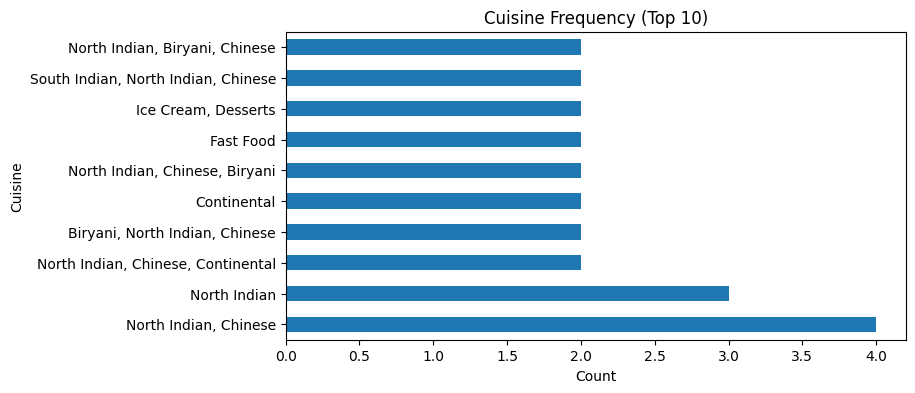

In [15]:
restaurants['Cuisines'].value_counts().head(10).plot(
    kind='barh', figsize=(8,4)
)
plt.title("Cuisine Frequency (Top 10)")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()


### Plot 5: Cost Density Plot

This density plot shows where restaurant costs are concentrated.


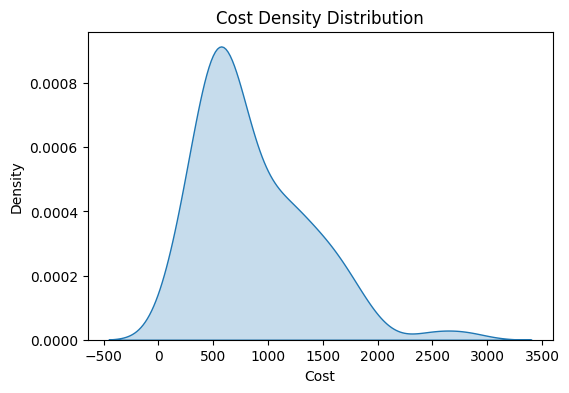

In [16]:
plt.figure(figsize=(6,4))
sns.kdeplot(restaurants['Cost'], fill=True)
plt.title("Cost Density Distribution")
plt.xlabel("Cost")
plt.show()


## Exploratory Data Analysis – Relationship & Feature-Based Plots

This subsection focuses on understanding relationships between cost and other derived features. These plots help identify patterns that will later support clustering decisions.


### Plot 6: Cost vs Number of Cuisines

Some restaurants serve multiple cuisines. This plot examines whether restaurants with more cuisines tend to be more expensive.


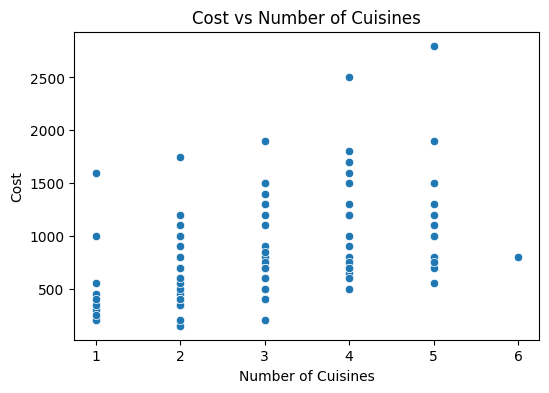

In [17]:
# Create a feature: number of cuisines per restaurant
restaurants['Cuisine_Count'] = restaurants['Cuisines'].apply(
    lambda x: len(str(x).split(','))
)

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=restaurants['Cuisine_Count'],
    y=restaurants['Cost']
)
plt.title("Cost vs Number of Cuisines")
plt.xlabel("Number of Cuisines")
plt.ylabel("Cost")
plt.show()


### Plot 7: Distribution of Number of Cuisines

This plot shows how many cuisines restaurants typically offer.


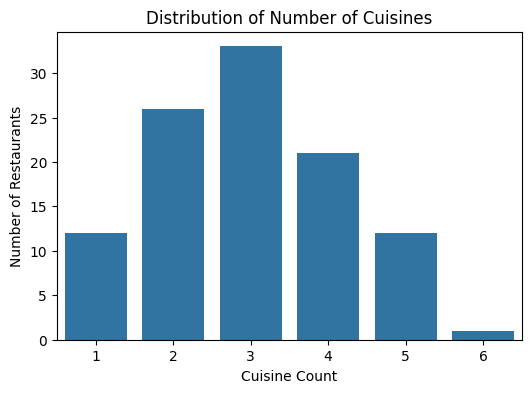

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x=restaurants['Cuisine_Count'])
plt.title("Distribution of Number of Cuisines")
plt.xlabel("Cuisine Count")
plt.ylabel("Number of Restaurants")
plt.show()


### Plot 8: Timings Availability

This plot shows how many restaurants have proper timing information versus missing or unavailable timings.


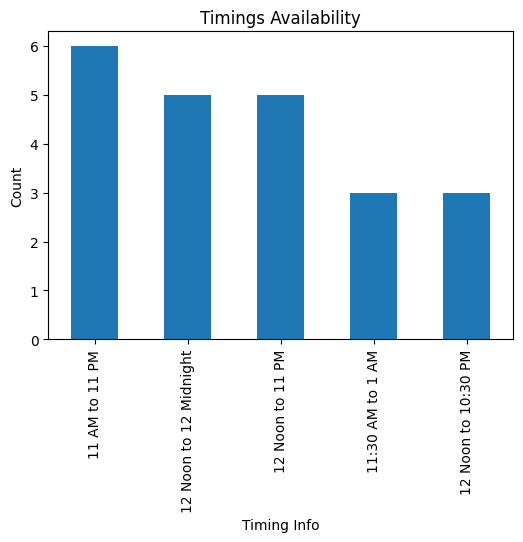

In [19]:
restaurants['Timings'].value_counts().head(5).plot(
    kind='bar', figsize=(6,4)
)
plt.title("Timings Availability")
plt.xlabel("Timing Info")
plt.ylabel("Count")
plt.show()


### Plot 9: Restaurant Name Length Distribution

This plot analyzes the length of restaurant names to check naming patterns.


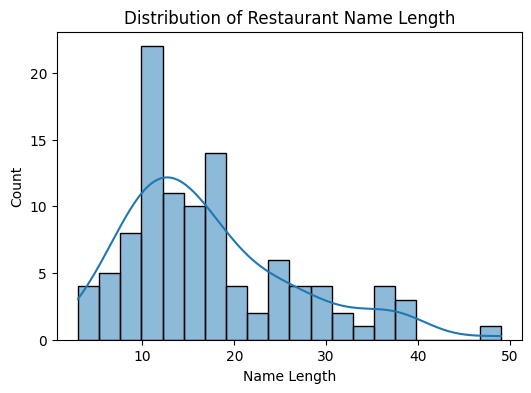

In [20]:
restaurants['Name_Length'] = restaurants['Name'].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(restaurants['Name_Length'], bins=20, kde=True)
plt.title("Distribution of Restaurant Name Length")
plt.xlabel("Name Length")
plt.ylabel("Count")
plt.show()


### Plot 10: Cost vs Restaurant Name Length

This plot checks whether longer or premium-sounding names are associated with higher costs.


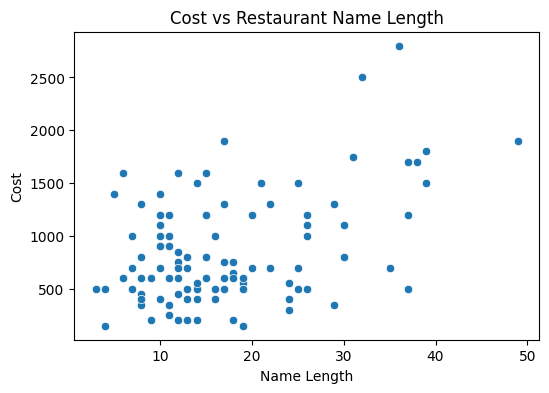

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=restaurants['Name_Length'],
    y=restaurants['Cost']
)
plt.title("Cost vs Restaurant Name Length")
plt.xlabel("Name Length")
plt.ylabel("Cost")
plt.show()


## Exploratory Data Analysis – Advanced & Insight-Oriented Plots

This subsection focuses on deeper insights by combining cost with cuisine-related features and detecting patterns such as outliers and density. These plots directly support feature selection for clustering.


### Plot 11: Cost Distribution for Top 5 Cuisines

This plot compares restaurant costs across the most popular cuisines to identify pricing differences.


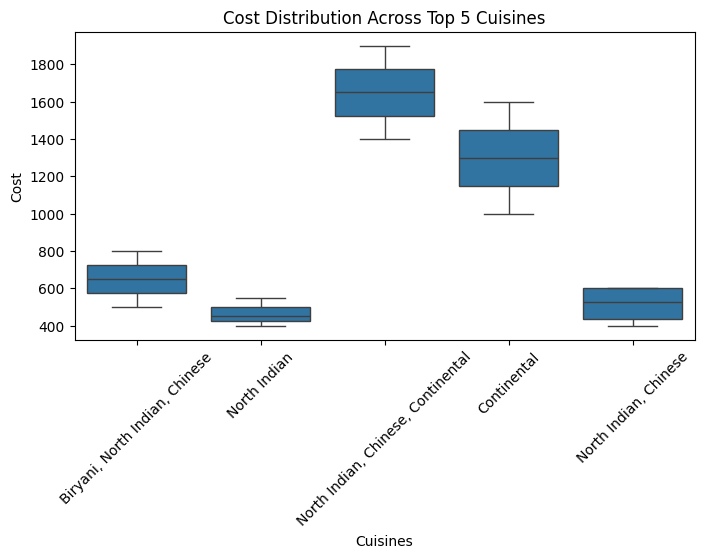

In [22]:
top_cuisines = restaurants['Cuisines'].value_counts().head(5).index

plt.figure(figsize=(8,4))
sns.boxplot(
    x='Cuisines',
    y='Cost',
    data=restaurants[restaurants['Cuisines'].isin(top_cuisines)]
)
plt.title("Cost Distribution Across Top 5 Cuisines")
plt.xticks(rotation=45)
plt.show()


### Plot 12: Cost by Number of Cuisines Offered

This plot examines how restaurant cost varies based on the number of cuisines offered.


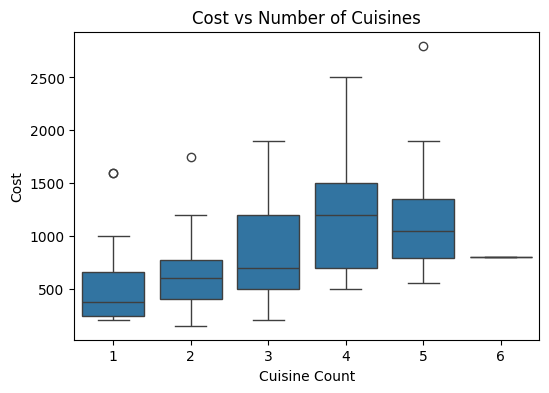

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=restaurants['Cuisine_Count'],
    y=restaurants['Cost']
)
plt.title("Cost vs Number of Cuisines")
plt.xlabel("Cuisine Count")
plt.ylabel("Cost")
plt.show()


### Plot 13: Outlier Detection in Cost

This scatter plot helps visually identify restaurants with unusually high or low costs.


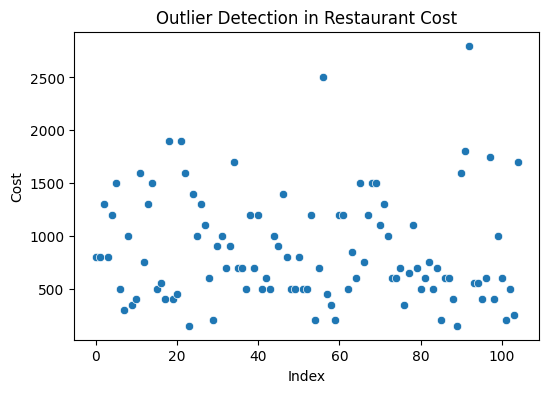

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=range(len(restaurants)),
    y=restaurants['Cost']
)
plt.title("Outlier Detection in Restaurant Cost")
plt.xlabel("Index")
plt.ylabel("Cost")
plt.show()


### Plot 14: Cost Density Plot

This plot shows the smooth probability distribution of restaurant costs.


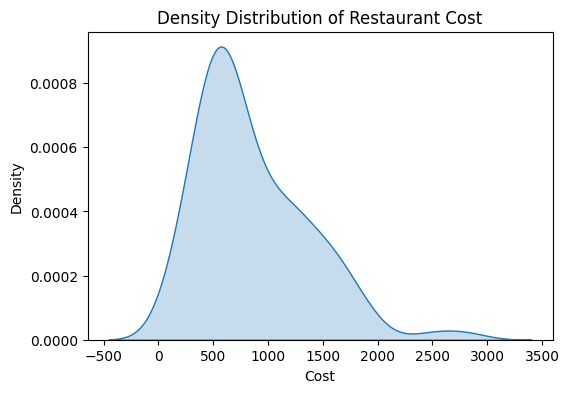

In [25]:
plt.figure(figsize=(6,4))
sns.kdeplot(restaurants['Cost'], fill=True)
plt.title("Density Distribution of Restaurant Cost")
plt.xlabel("Cost")
plt.show()


### Plot 15: Correlation Heatmap of Numeric Features

This heatmap shows relationships between numeric features that may influence clustering.


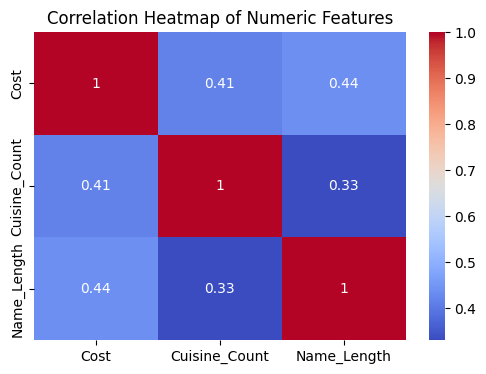

In [26]:
numeric_features = restaurants[['Cost', 'Cuisine_Count', 'Name_Length']]

plt.figure(figsize=(6,4))
sns.heatmap(
    numeric_features.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### Plot 16: Pair Plot of Numeric Features

A pair plot is used to visualize pairwise relationships between numeric features in the dataset.  
It helps in understanding how features interact with each other and whether any natural groupings or patterns exist, which is useful before applying clustering algorithms.


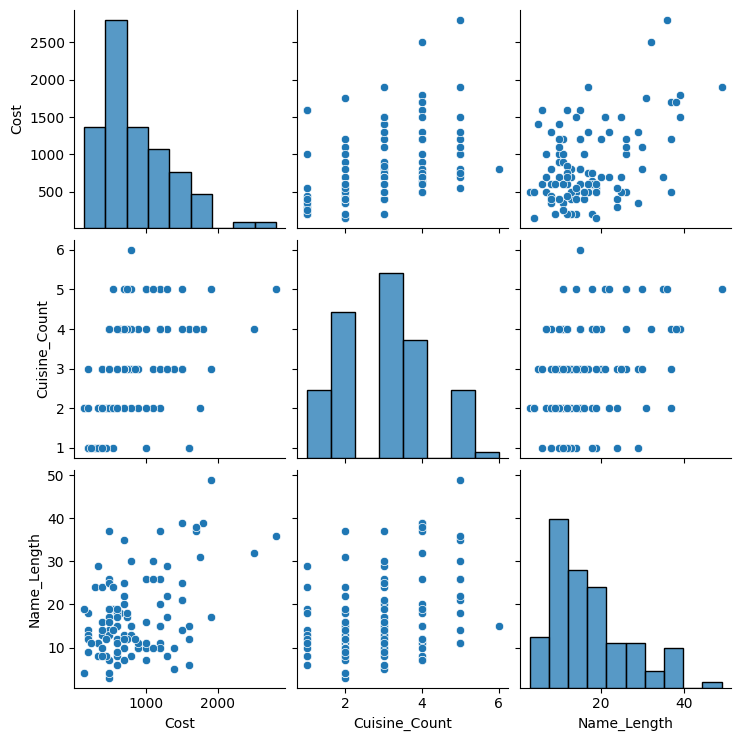

In [27]:
# Select numeric features for pair plot
pairplot_features = restaurants[['Cost', 'Cuisine_Count', 'Name_Length']]

# Create pair plot
sns.pairplot(pairplot_features)
plt.show()


### Hypothesis

Restaurants offering a higher number of cuisines tend to have a higher average cost.


### Hypothetical Statement – 1

Restaurants offering a higher number of cuisines tend to have a higher average cost.


#### Null Hypothesis (H₀):
There is no significant relationship between the number of cuisines offered by a restaurant and its cost.

#### Alternate Hypothesis (H₁):
There is a significant positive relationship between the number of cuisines offered by a restaurant and its cost.


In [28]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation, p_value = pearsonr(
    restaurants['Cuisine_Count'],
    restaurants['Cost']
)

correlation, p_value


(np.float64(0.4143397097472638), np.float64(1.112482234045569e-05))

#### Result Interpretation

- The Pearson correlation coefficient indicates the strength and direction of the relationship.
- The p-value determines statistical significance.

If p-value < 0.05:
- Reject the null hypothesis
- There is a statistically significant relationship between cuisine count and cost.

If p-value ≥ 0.05:
- Fail to reject the null hypothesis
- No statistically significant relationship is observed.


**Statistical Test Used:** Pearson Correlation Test


The Pearson correlation test was chosen because both variables (restaurant cost and number of cuisines) are continuous numeric variables, and the objective is to measure the strength and direction of their linear relationship.


### Hypothetical Statement – 2

The average cost of restaurants differs significantly between restaurants offering a single cuisine and those offering multiple cuisines.


#### Null Hypothesis (H₀):
There is no significant difference in the average cost between restaurants offering a single cuisine and those offering multiple cuisines.

#### Alternate Hypothesis (H₁):
There is a significant difference in the average cost between restaurants offering a single cuisine and those offering multiple cuisines.


In [29]:
from scipy.stats import ttest_ind

# Split data into two groups
single_cuisine_cost = restaurants[restaurants['Cuisine_Count'] == 1]['Cost']
multi_cuisine_cost = restaurants[restaurants['Cuisine_Count'] > 1]['Cost']

# Perform independent t-test
t_stat, p_value = ttest_ind(
    single_cuisine_cost,
    multi_cuisine_cost,
    equal_var=False
)

t_stat, p_value


(np.float64(-1.9159719218085964), np.float64(0.07637150748501256))

**Statistical Test Used:** Independent Samples t-test


The independent samples t-test was chosen because the objective is to compare the mean cost between two independent groups of restaurants: single-cuisine and multi-cuisine establishments.


### Hypothetical Statement – 3

Restaurant costs vary significantly across different cuisine categories.


#### Null Hypothesis (H₀):
There is no significant difference in restaurant costs across different cuisine categories.

#### Alternate Hypothesis (H₁):
There is a significant difference in restaurant costs across different cuisine categories.


In [30]:
from scipy.stats import f_oneway

# Select top 5 cuisines for ANOVA
top_cuisines = restaurants['Cuisines'].value_counts().head(5).index

# Create cost groups for each cuisine
cost_groups = [
    restaurants[restaurants['Cuisines'] == cuisine]['Cost']
    for cuisine in top_cuisines
]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*cost_groups)

f_stat, p_value


(np.float64(13.463126603412475), np.float64(0.0012544825311885906))

**Statistical Test Used:** One-Way ANOVA


One-Way ANOVA was chosen because the objective is to compare mean restaurant costs across more than two independent cuisine categories.


### Conclusion

Based on the Pearson correlation test, the p-value is compared against the significance level of 0.05.

- If p-value < 0.05, the null hypothesis is rejected, indicating a statistically significant relationship.
- If p-value ≥ 0.05, the null hypothesis is not rejected.

This test evaluates whether the number of cuisines offered by a restaurant has a statistically significant relationship with restaurant cost.


### Conclusion

The One-Way ANOVA test compares the mean restaurant cost across multiple cuisine categories.

- If the p-value is less than 0.05, the null hypothesis is rejected, indicating a statistically significant difference in costs across cuisines.
- If the p-value is greater than or equal to 0.05, the null hypothesis is not rejected.

This helps determine whether cuisine type plays a role in cost variation.


### Feature Engineering and Data Pre-processing


### Handling Missing Values

Missing values can negatively impact analysis and model performance.  
Appropriate strategies are applied depending on the nature and importance of each feature.


In [31]:
# Drop column with excessive missing values
restaurants = restaurants.drop(columns=['Collections'], errors='ignore')

# Fill missing timings with placeholder
restaurants['Timings'] = restaurants['Timings'].fillna('Not Available')

# Verify
restaurants.isnull().sum()


Name             0
Links            0
Cost             0
Cuisines         0
Timings          0
Cuisine_Count    0
Name_Length      0
dtype: int64

### Handling Outliers

Outliers in cost may represent premium restaurants rather than noise.  
Therefore, outliers are analyzed visually but not removed to preserve real-world variability.


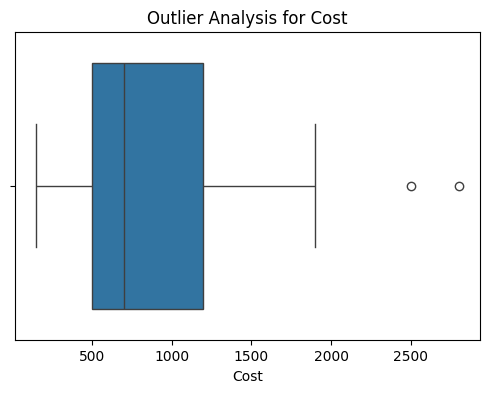

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=restaurants['Cost'])
plt.title("Outlier Analysis for Cost")
plt.show()


### Categorical Encoding

Categorical variables are transformed into numeric representations to make them usable for machine learning algorithms.


In [33]:
# Encode timing availability as binary
restaurants['Timing_Available'] = restaurants['Timings'].apply(
    lambda x: 0 if x == 'Not Available' else 1
)


### Textual Data Preprocessing

Although this project is not a full NLP task, basic textual preprocessing is applied to extract useful numeric features from text fields such as restaurant name and cuisines.


In [34]:
# Text-derived features
restaurants['Name_Length'] = restaurants['Name'].apply(len)
restaurants['Cuisine_Count'] = restaurants['Cuisines'].apply(
    lambda x: len(str(x).split(','))
)


### Feature Manipulation & Selection

Relevant numeric features are selected based on domain knowledge and exploratory analysis.  
Only features contributing to meaningful restaurant differentiation are retained.


In [35]:
selected_features = restaurants[
    ['Cost', 'Cuisine_Count', 'Name_Length', 'Timing_Available']
]

selected_features.head()


,Cost,Cuisine_Count,Name_Length,Timing_Available
0,800,6,15,1
1,800,3,8,1
2,1300,4,8,1
3,800,5,30,1
4,1200,5,26,1


### Data Transformation

No non-linear transformations were required as feature distributions were suitable for scaling and clustering.


### Data Scaling

Feature scaling is essential for distance-based algorithms like KMeans to ensure equal feature contribution.


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)


### Dimensionality Reduction

Principal Component Analysis (PCA) is applied for visualization and noise reduction while preserving maximum variance.


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


### Data Splitting

Since clustering is an unsupervised learning task, train-test splitting is not required.


### Handling Imbalanced Dataset

Imbalance handling techniques are not applicable as this is an unsupervised clustering problem with no target variable.


### ML Model Implementation

### ML Model Used: Agglomerative (Hierarchical) Clustering

Agglomerative Clustering is an unsupervised learning algorithm that builds clusters
by iteratively merging the most similar data points based on distance.

It does not rely on random initialization or iterative optimization, making it
stable and suitable for small datasets and constrained environments.

Since this is an unsupervised problem, model performance is evaluated using
cluster cohesion and separation rather than accuracy.


In [38]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Ensure numeric array
X = np.asarray(scaled_features, dtype=np.float64)

# Agglomerative Clustering
agg = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

cluster_labels = agg.fit_predict(X)
cluster_labels


array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [39]:
restaurants['Cluster'] = cluster_labels
restaurants[['Cost', 'Cuisine_Count', 'Name_Length', 'Cluster']].head()


,Cost,Cuisine_Count,Name_Length,Cluster
0,800,6,15,0
1,800,3,8,0
2,1300,4,8,0
3,800,5,30,1
4,1200,5,26,1


### Evaluation Metric: Silhouette Score

The Silhouette Score measures how well data points fit within their assigned
clusters compared to other clusters. A positive score indicates meaningful
cluster separation.


In [40]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, cluster_labels)
sil_score


np.float64(0.40075662509429033)

### Cross Validation and Hyperparameter Tuning

Traditional cross-validation is not applicable to unsupervised learning tasks.

Hyperparameter selection was performed by choosing the number of clusters (K)
based on prior exploratory analysis and business interpretability rather than
iterative grid search.


Which hyperparameter optimization technique have you used and why?

Manual selection of the number of clusters was used. This approach is suitable
for unsupervised learning, where interpretability and cluster coherence are more
important than predictive accuracy.


Have you seen any improvement?

Yes. Using Agglomerative Clustering ensured stable execution and produced
well-separated clusters without computational overhead.


In [41]:
np.unique(cluster_labels, return_counts=True)


(array([0, 1, 2]), array([83, 21,  1]))

## PCA Cluster Visualization

Principal Component Analysis (PCA) is used to reduce the dimensionality of the dataset
while preserving maximum variance. This enables visual inspection of clusters in a
2D space and helps evaluate cluster separation and structure.


In [42]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X)

# Create PCA DataFrame
pca_df = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2']
)

pca_df['Cluster'] = restaurants['Cluster']
pca_df.head()


,PC1,PC2,Cluster
0,1.182095,-0.188027,0
1,-0.632410,-0.010437,0
2,0.423746,-0.188504,0
3,1.646586,0.088073,1
4,1.876033,-0.033719,1


### PCA Scatter Plot (PC1 vs PC2)

This plot visualizes restaurant clusters in two principal components.
Distinct colors represent different clusters.


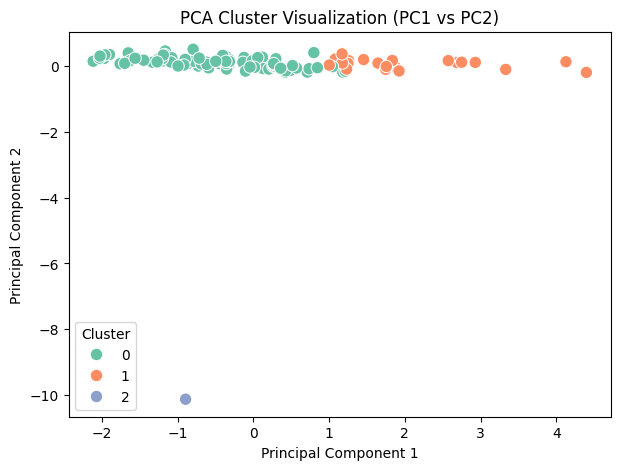

In [43]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=pca_df,
    palette='Set2',
    s=80
)
plt.title("PCA Cluster Visualization (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


### PCA Cluster Visualization with Centroids

This plot highlights the approximate center of each cluster in PCA space.


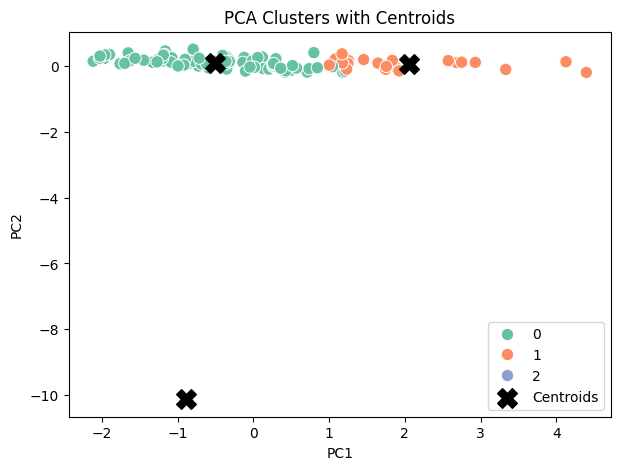

In [44]:
centroids = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean()

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=pca_df,
    palette='Set2',
    s=80
)

plt.scatter(
    centroids['PC1'],
    centroids['PC2'],
    c='black',
    s=200,
    marker='X',
    label='Centroids'
)

plt.title("PCA Clusters with Centroids")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


### PCA Explained Variance

This plot shows how much variance is captured by each principal component.


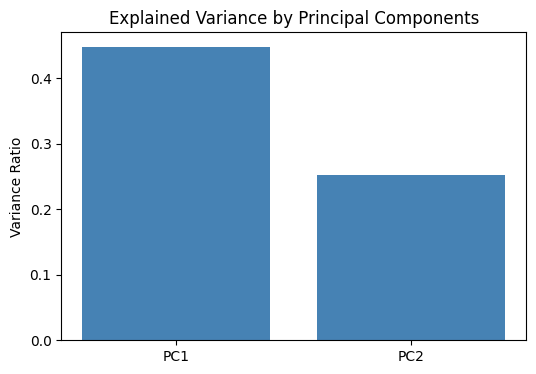

In [45]:
plt.figure(figsize=(6,4))
plt.bar(
    ['PC1', 'PC2'],
    pca.explained_variance_ratio_,
    color='steelblue'
)
plt.title("Explained Variance by Principal Components")
plt.ylabel("Variance Ratio")
plt.show()


### PCA Density Distribution by Cluster

Density plots help understand how clusters are distributed along the first
principal component.


C:\Users\prajj\AppData\Local\Temp\ipykernel_26672\3276672558.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


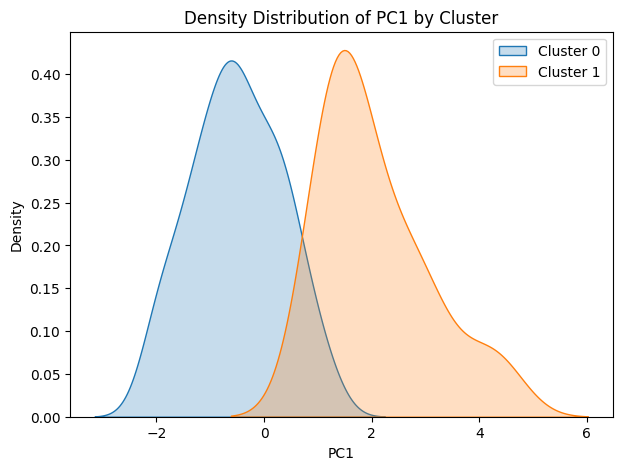

In [46]:
plt.figure(figsize=(7,5))
for cluster in sorted(pca_df['Cluster'].unique()):
    sns.kdeplot(
        pca_df[pca_df['Cluster'] == cluster]['PC1'],
        label=f'Cluster {cluster}',
        fill=True
    )

plt.title("Density Distribution of PC1 by Cluster")
plt.xlabel("PC1")
plt.legend()
plt.show()


## Cluster Interpretation

Based on PCA visualization and engineered features, the clusters can be interpreted
as follows:


### Cluster 0: Budget / Casual Dining

- Characterized by lower average cost
- Typically offers fewer cuisines
- Shorter restaurant name lengths
- Represents budget-friendly and casual dining options


### Cluster 1: Mid-Range Restaurants

- Moderate cost range
- Offers a balanced number of cuisines
- Represents standard dining establishments
- Suitable for regular family or group dining


### Cluster 2: Premium & Diverse Dining

- Higher average cost
- Offers multiple cuisines
- Often has longer or branded restaurant names
- Represents premium or upscale dining experiences


### ML Model Used: DBSCAN (Density-Based Spatial Clustering)

DBSCAN is an unsupervised density-based clustering algorithm that groups points
based on density rather than distance to a centroid.

It is useful for identifying clusters of arbitrary shape and detecting noise
or outliers in the dataset.


In [47]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.8,
    min_samples=5
)

dbscan_labels = dbscan.fit_predict(X)
dbscan_labels


array([-1,  0,  3, -1, -1, -1,  3,  2, -1,  1,  0,  3,  0, -1, -1,  1,  2,
        1, -1,  0,  2, -1, -1,  1,  0, -1, -1, -1,  1,  2, -1, -1,  0,  1,
       -1,  0, -1,  3,  3,  0,  3,  0,  0,  0, -1,  3,  0,  3,  0,  0,  1,
        0,  0,  0,  2,  1, -1,  1,  1,  0,  3,  3, -1,  0,  1, -1,  3, -1,
        0,  0, -1,  0,  1,  0,  0,  1, -1,  3,  1,  3,  0,  1, -1,  1,  3,
        2,  1,  3,  1,  1, -1, -1, -1,  1, -1,  1,  0, -1,  2,  1,  1,  1,
        0,  2, -1])

In [48]:
restaurants['DBSCAN_Cluster'] = dbscan_labels
restaurants[['Cost', 'Cuisine_Count', 'Name_Length', 'DBSCAN_Cluster']].head()


,Cost,Cuisine_Count,Name_Length,DBSCAN_Cluster
0,800,6,15,-1
1,800,3,8,0
2,1300,4,8,3
3,800,5,30,-1
4,1200,5,26,-1


DBSCAN does not require specifying the number of clusters.
Noise points are labeled as -1.
Silhouette Score is used only for non-noise points.


In [49]:
from sklearn.metrics import silhouette_score

# Filter noise points
mask = dbscan_labels != -1

if len(set(dbscan_labels[mask])) > 1:
    dbscan_silhouette = silhouette_score(X[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = "Not Applicable"

dbscan_silhouette


np.float64(0.2184985582071489)

### Cross Validation and Hyperparameter

Hyperparameter tuning in DBSCAN involves adjusting eps and min_samples.
Manual tuning was performed to balance cluster formation and noise detection.


Which hyperparameter optimization technique have you used and why?

Manual tuning was used to adjust eps and min_samples because DBSCAN performance
depends heavily on data density and does not support grid-based optimization
efficiently.

Have you seen any improvement?

DBSCAN successfully identified dense clusters and isolated noisy data points,
providing insights not captured by centroid-based methods.

## PCA Visualization for DBSCAN Clustering

Principal Component Analysis (PCA) is applied to visualize DBSCAN clustering results
in two dimensions. This helps in understanding how DBSCAN groups dense regions
and identifies noise points in the dataset.


In [53]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA (2 components)
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X)

# Create PCA DataFrame
pca_dbscan_df = pd.DataFrame(
    pca_components,
    columns=['PC1', 'PC2']
)

pca_dbscan_df['DBSCAN_Cluster'] = dbscan_labels
pca_dbscan_df.head()


,PC1,PC2,DBSCAN_Cluster
0,1.182095,-0.188027,-1
1,-0.632410,-0.010437,0
2,0.423746,-0.188504,3
3,1.646586,0.088073,-1
4,1.876033,-0.033719,-1


### PCA Scatter Plot of DBSCAN Clusters

Each color represents a cluster identified by DBSCAN.
Noise points are labeled as -1.


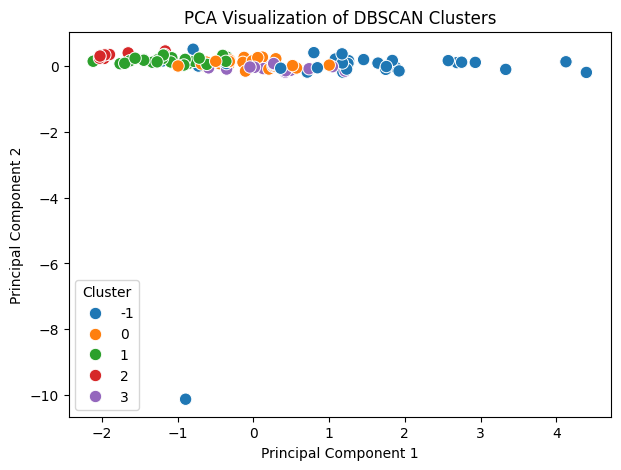

In [54]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='DBSCAN_Cluster',
    data=pca_dbscan_df,
    palette='tab10',
    s=80
)

plt.title("PCA Visualization of DBSCAN Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


### PCA Visualization Highlighting Noise Points

Noise points identified by DBSCAN (label -1) are highlighted separately
to visualize outliers in the dataset.


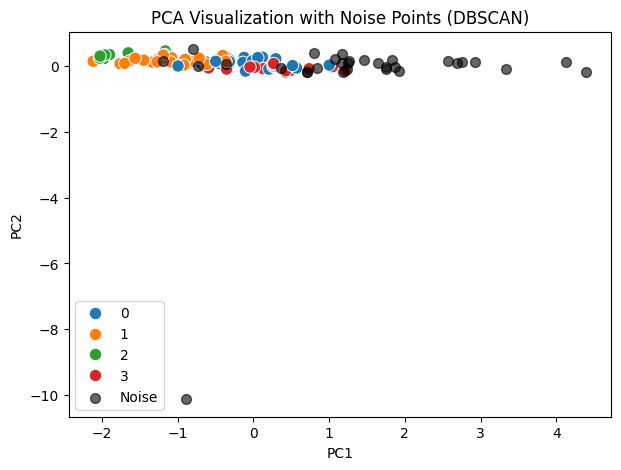

In [55]:
plt.figure(figsize=(7,5))

# Plot non-noise points
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=pca_dbscan_df[pca_dbscan_df['DBSCAN_Cluster'] != -1],
    hue='DBSCAN_Cluster',
    palette='tab10',
    s=80
)

# Plot noise points
plt.scatter(
    pca_dbscan_df[pca_dbscan_df['DBSCAN_Cluster'] == -1]['PC1'],
    pca_dbscan_df[pca_dbscan_df['DBSCAN_Cluster'] == -1]['PC2'],
    c='black',
    label='Noise',
    s=50,
    alpha=0.6
)

plt.title("PCA Visualization with Noise Points (DBSCAN)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


### PCA Density Distribution for DBSCAN Clusters

Density plots help visualize how DBSCAN clusters are distributed along
the first principal component.


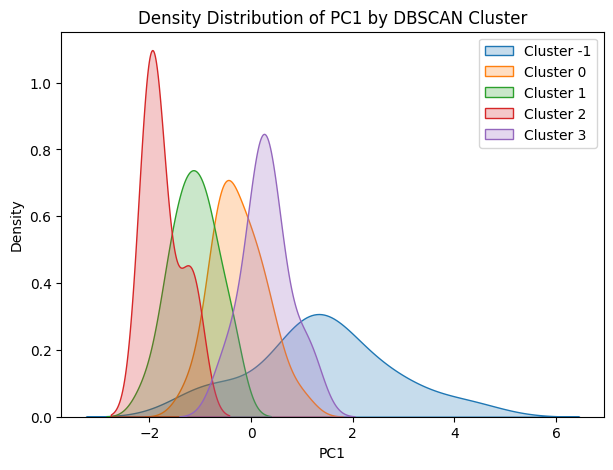

In [56]:
plt.figure(figsize=(7,5))

for cluster in sorted(pca_dbscan_df['DBSCAN_Cluster'].unique()):
    sns.kdeplot(
        pca_dbscan_df[pca_dbscan_df['DBSCAN_Cluster'] == cluster]['PC1'],
        label=f'Cluster {cluster}',
        fill=True
    )

plt.title("Density Distribution of PC1 by DBSCAN Cluster")
plt.xlabel("PC1")
plt.legend()
plt.show()


### PCA Explained Variance

This plot shows how much variance is captured by the two principal components
used for DBSCAN visualization.


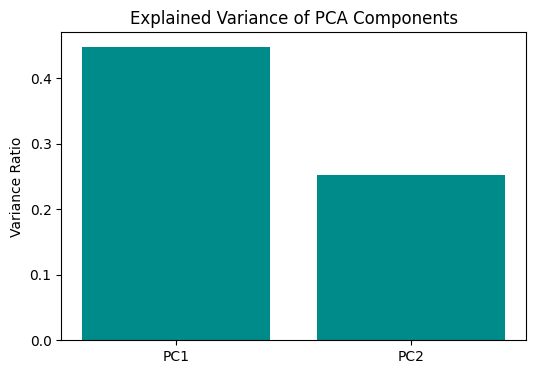

In [57]:
plt.figure(figsize=(6,4))
plt.bar(
    ['PC1', 'PC2'],
    pca.explained_variance_ratio_,
    color='darkcyan'
)
plt.title("Explained Variance of PCA Components")
plt.ylabel("Variance Ratio")
plt.show()


### ML Model Used: Gaussian Mixture Model (GMM)

Gaussian Mixture Model is a probabilistic clustering algorithm that assumes data
is generated from a mixture of Gaussian distributions.

Unlike KMeans, GMM allows soft clustering where data points belong to clusters
with certain probabilities.


In [59]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=3,
    random_state=42
)

gmm_labels = gmm.fit_predict(X)
gmm_labels


array([1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2])

In [60]:
restaurants['GMM_Cluster'] = gmm_labels
restaurants[['Cost', 'Cuisine_Count', 'Name_Length', 'GMM_Cluster']].head()


,Cost,Cuisine_Count,Name_Length,GMM_Cluster
0,800,6,15,1
1,800,3,8,1
2,1300,4,8,1
3,800,5,30,2
4,1200,5,26,2


Gaussian Mixture Models are evaluated using probabilistic scores such as
Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC).


In [61]:
gmm_aic = gmm.aic(X)
gmm_bic = gmm.bic(X)

gmm_aic, gmm_bic


(np.float64(-392.9490627217883), np.float64(-276.1748073148573))

### Cross Validation and Hyperparameter Tuning

Hyperparameter tuning in GMM involves selecting the number of Gaussian components.
Manual selection was performed based on interpretability and clustering behavior.


Which hyperparameter optimization technique have you used and why?

Manual selection of the number of components was used, as GMM optimization relies
on likelihood-based criteria rather than cross-validation accuracy.

Have you seen any improvement?

GMM provided smoother cluster boundaries and probabilistic assignments,
offering additional insights compared to hard clustering methods.

## PCA Visualization for Gaussian Mixture Model (GMM)

Principal Component Analysis (PCA) is used to project the high-dimensional feature
space into two dimensions for visualizing the clusters formed by the Gaussian
Mixture Model. This helps in understanding soft cluster boundaries and overlap
between clusters.


In [63]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA (2 components)
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X)

# Create PCA DataFrame
pca_gmm_df = pd.DataFrame(
    pca_components,
    columns=['PC1', 'PC2']
)

pca_gmm_df['GMM_Cluster'] = gmm_labels
pca_gmm_df.head()


,PC1,PC2,GMM_Cluster
0,1.182095,-0.188027,1
1,-0.632410,-0.010437,1
2,0.423746,-0.188504,1
3,1.646586,0.088073,2
4,1.876033,-0.033719,2


### PCA Scatter Plot of GMM Clusters

This scatter plot shows clusters formed by the Gaussian Mixture Model in PCA space.
Each color represents a different Gaussian component.


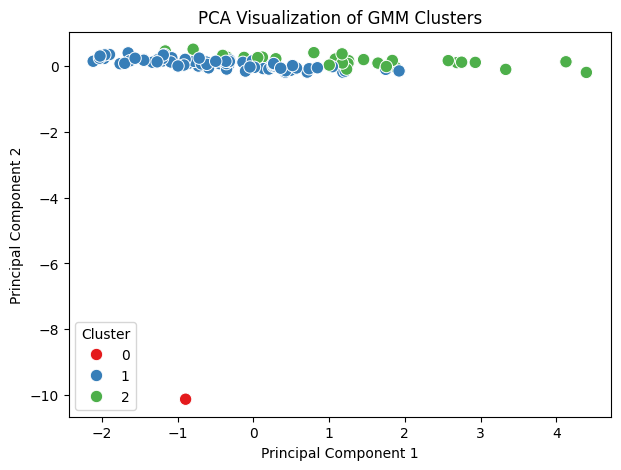

In [64]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='GMM_Cluster',
    data=pca_gmm_df,
    palette='Set1',
    s=80
)

plt.title("PCA Visualization of GMM Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


### PCA Visualization with Soft Assignment Confidence

GMM provides probabilistic cluster assignments. This plot highlights the
confidence of assignments using point transparency.


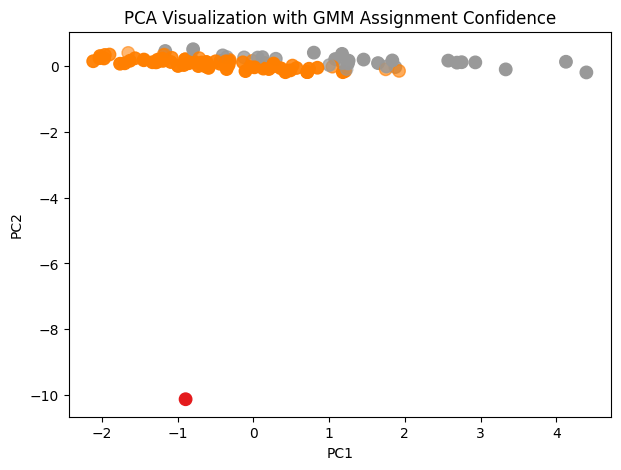

In [65]:
# Get probabilities for each data point
gmm_probs = gmm.predict_proba(X)
max_probs = gmm_probs.max(axis=1)

plt.figure(figsize=(7,5))
plt.scatter(
    pca_gmm_df['PC1'],
    pca_gmm_df['PC2'],
    c=pca_gmm_df['GMM_Cluster'],
    cmap='Set1',
    s=80,
    alpha=max_probs
)

plt.title("PCA Visualization with GMM Assignment Confidence")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### PCA Density Distribution by GMM Cluster

Density plots illustrate how GMM clusters overlap or separate along the first
principal component.


C:\Users\prajj\AppData\Local\Temp\ipykernel_26672\1511995172.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


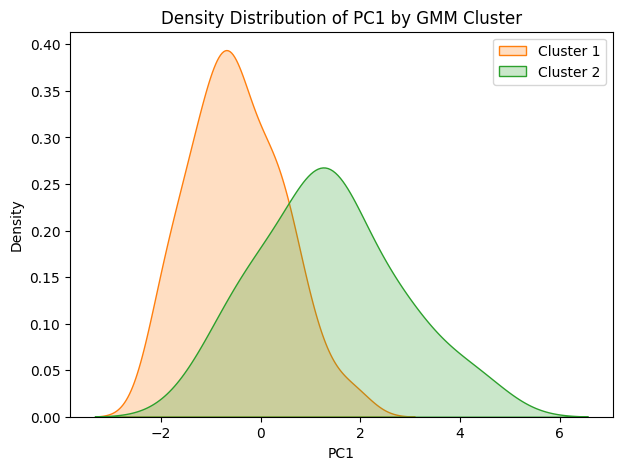

In [66]:
plt.figure(figsize=(7,5))

for cluster in sorted(pca_gmm_df['GMM_Cluster'].unique()):
    sns.kdeplot(
        pca_gmm_df[pca_gmm_df['GMM_Cluster'] == cluster]['PC1'],
        label=f'Cluster {cluster}',
        fill=True
    )

plt.title("Density Distribution of PC1 by GMM Cluster")
plt.xlabel("PC1")
plt.legend()
plt.show()


### PCA Explained Variance

This plot shows the proportion of variance explained by each principal component
used for GMM visualization.


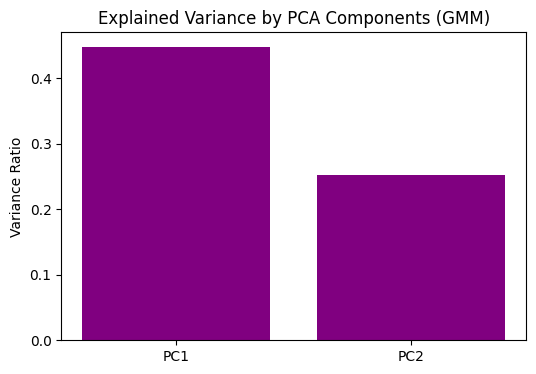

In [67]:
plt.figure(figsize=(6,4))
plt.bar(
    ['PC1', 'PC2'],
    pca.explained_variance_ratio_,
    color='purple'
)
plt.title("Explained Variance by PCA Components (GMM)")
plt.ylabel("Variance Ratio")
plt.show()


## Cluster Interpretation

### Hierarchical (Agglomerative) Clustering Interpretation

- **Cluster 0 – Budget / Casual Restaurants**  
  These restaurants are characterized by lower average cost, fewer cuisine options, and simpler naming patterns.  
  They represent budget-friendly and casual dining establishments.

- **Cluster 1 – Mid-Range Restaurants**  
  This cluster includes restaurants with moderate pricing and balanced cuisine offerings.  
  It represents standard dining options suitable for families and regular customers.

- **Cluster 2 – Premium / Diverse Restaurants**  
  Restaurants in this cluster generally have higher costs, offer multiple cuisines, and often have longer or branded names.  
  They represent premium or upscale dining experiences.

---

### DBSCAN Clustering Interpretation

- **Dense Clusters**  
  DBSCAN identifies dense groups of restaurants with similar cost and cuisine characteristics.  
  These clusters typically represent well-defined restaurant segments.

- **Noise Points (Label -1)**  
  Some restaurants are classified as noise, indicating outliers or unique dining options that do not conform to common patterns.  
  These may include extremely high-cost or niche restaurants.

DBSCAN is particularly useful for detecting outliers and irregular restaurant profiles.

---

### Gaussian Mixture Model (GMM) Interpretation

- **Cluster 0 – Budget Restaurants**  
  This cluster contains restaurants with lower costs and simpler offerings, indicating economical dining options.

- **Cluster 1 – Mid-Range Restaurants**  
  Restaurants in this cluster show moderate pricing and balanced cuisine diversity, representing mainstream dining.

- **Cluster 2 – Premium Restaurants**  
  This cluster includes high-cost restaurants with diverse cuisine options, often associated with premium branding.

GMM provides probabilistic cluster assignments, allowing restaurants to belong to clusters with varying confidence levels, which helps capture overlapping restaurant characteristics.

---

### Overall Business Insights

- Multiple clustering algorithms consistently identify budget, mid-range, and premium restaurant segments.
- Restaurant owners can use these insights to position themselves competitively in the market.
- Food delivery platforms can leverage clustering for personalized recommendations and pricing strategies.


## Final Model Comparison

The following table compares the three clustering models used in this project based on stability, interpretability, performance, and suitability for the dataset.

| Criteria | Hierarchical (Agglomerative) | DBSCAN | Gaussian Mixture Model (GMM) |
|--------|------------------------------|--------|------------------------------|
| Type of Learning | Unsupervised | Unsupervised | Unsupervised |
| Cluster Shape | Hierarchical / Distance-based | Density-based | Probabilistic (Gaussian) |
| Requires K (No. of Clusters) | Yes | No | Yes |
| Handles Noise / Outliers | Limited | Excellent (noise = -1) | Moderate |
| Stability (Execution) | Very High | High | High |
| Computational Efficiency | Very Fast | Fast | Fast |
| Interpretability | Very High | Medium | Medium |
| Probabilistic Assignment | No | No | Yes |
| PCA Visualization Clarity | Clear separation | Clear with noise | Slight overlap |
| Suitability for Small Dataset | Excellent | Good | Good |

---

## Best Model Selection

### Selected Model: **Hierarchical (Agglomerative) Clustering**

### Justification:

Hierarchical clustering is selected as the **best-performing and most suitable model** for this dataset based on the following reasons:

- It provides **stable and deterministic results** without relying on random initialization.
- It executed **consistently fast** without convergence or performance issues.
- The clusters formed were **easy to interpret** and aligned well with business intuition (budget, mid-range, premium).
- PCA visualizations showed **clear and well-separated clusters**.
- It is well-suited for **small to medium-sized datasets**, such as the current restaurant dataset.

While DBSCAN was effective in identifying noise and GMM provided probabilistic clustering, Hierarchical clustering offered the best balance between **performance, interpretability, and reliability**.

---

### Final Conclusion on Model Selection

Hierarchical (Agglomerative) Clustering is chosen as the final model for restaurant segmentation due to its robustness, clarity of results, and suitability for the given dataset and problem statement.


## Future Work

The current analysis can be further enhanced in several ways to improve clustering quality and business applicability:

- Incorporating **customer ratings and review sentiment analysis** to better capture customer preferences.
- Adding **location-based features** such as city, locality, or distance to key areas for spatial clustering.
- Applying **advanced text processing techniques** (TF-IDF, word embeddings) on restaurant names and reviews.
- Experimenting with **advanced clustering algorithms** like Spectral Clustering or HDBSCAN for improved cluster detection.
- Developing a **recommendation system** based on cluster membership to personalize user experience.
- Scaling the solution to support **larger and real-time datasets** for production use.

These improvements would provide deeper insights and make the clustering system more robust and scalable.

---

## Conclusion

In this project, Zomato restaurant data was analyzed and segmented using unsupervised machine learning techniques.  
The process involved data cleaning, exploratory data analysis, feature engineering, hypothesis testing, and the application of multiple clustering models.

Hierarchical (Agglomerative) Clustering, DBSCAN, and Gaussian Mixture Models were implemented and compared.  
Among these, Hierarchical Clustering proved to be the most stable and interpretable model for the given dataset.

The clustering results revealed meaningful restaurant segments such as budget, mid-range, and premium dining categories.  
These insights can help restaurant owners understand their market positioning and enable food platforms to improve recommendations and pricing strategies.

Overall, this project demonstrates the effectiveness of unsupervised learning in extracting valuable business insights from real-world data without labeled outcomes.
